<a href="https://colab.research.google.com/github/saicharan0210/Btech-final-project/blob/main/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTION OF AIR QUALITY INDEX USING MACHINE lEARNING MODELS**

**Importing modules**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot
import matplotlib.dates
from sklearn.impute import KNNImputer
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

**READING RAW DATA FILE**

**CASE 1:RAW DATA FILE CONSITS OF POLLUTANT CONCENTRATIONS ONLY**

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/project/rk puram pollutant.csv',encoding= 'unicode_escape')

In [ ]:
df.head()

date  pm25  pm10  o3  no2  so2  co
0  01-01-2018  351   440   20  40   12   23
1  02-01-2018  386   282   22  32   9    18
2  03-01-2018  289   211   22  42   8    17
3  04-01-2018  244   276   13  34   8    19
4  05-01-2018  282   260   32  37   9    22

In [ ]:
len(df), len(df.columns)

(1486, 7)

In [ ]:
df1= df.replace(r'^\s*$', np.NaN, regex=True)

In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1486 non-null   object
 1    pm25   1328 non-null   object
 2    pm10   1435 non-null   object
 3    o3     1470 non-null   object
 4    no2    1464 non-null   object
 5    so2    1469 non-null   object
 6    co     1429 non-null   object
dtypes: object(7)
memory usage: 81.4+ KB


**FINDING NULL VALUES IN DATA SET**

In [ ]:
df1.isnull().sum()

date     0  
 pm25    158
 pm10    51 
 o3      16 
 no2     22 
 so2     17 
 co      57 
dtype: int64

In [ ]:
df1.isna()

date   pm25   pm10     o3    no2    so2     co
0     False  False  False  False  False  False  False
1     False  False  False  False  False  False  False
2     False  False  False  False  False  False  False
3     False  False  False  False  False  False  False
4     False  False  False  False  False  False  False
5     False  False  False  False  False  False  False
6     False  False  False  False  False  False  False
7     False  False  False  False  False  False  False
8     False  False  False  False  False  False  False
9     False  False  False  False  False  False  False
10    False  False  False  False  False  False  False
11    False  False  False  False  False  False  False
12    False  False  False  False  False  False  False
13    False  False  False  False  False  False  False
14    False  False  False  False  False  False  False
15    False  False  False  False  False  False  False
16    False  False  False  False  False  False  False
17    False  False  False  False  False  False  False
18    False  False  False  False  False  False  False
19    False  False  False  False  False  False  True 
20    False  False  False  False  False  False  False
21    False  False  False  False  False  False  False
22    False  False  False  False  False  False  False
23    False  False  False  False  False  False  False
24    False  False  False  False  False  False  False
25    False  False  False  False  False  False  False
26    False  False  False  False  False  False  False
27    False  False  False  False  False  False  False
28    False  False  False  False  False  False  False
29    False  False  False  False  False  False  False
30    False  False  False  False  False  False  False
31    False  False  False  False  False  False  False
32    False  False  False  False  False  False  False
33    False  False  False  False  False  False  False
34    False  False  False  False  False  False  False
35    False  False  False  False  False  False  False
36    False  False  False  False  False  False  False
37    False  False  False  False  False  False  False
38    False  False  False  False  False  False  False
39    False  False  False  False  False  False  False
40    False  False  False  False  False  False  False
41    False  False  False  False  False  False  False
42    False  False  False  False  False  False  False
43    False  False  False  False  False  False  False
44    False  False  False  False  False  False  False
45    False  False  False  False  False  False  False
46    False  False  False  False  False  False  False
47    False  False  False  False  False  False  False
48    False  False  False  False  False  False  False
49    False  False  False  False  False  False  False
50    False  False  False  False  False  False  False
51    False  False  False  False  False  False  False
52    False  False  False  False  False  False  False
53    False  False  False  False  False  False  False
54    False  False  False  False  False  False  False
55    False  False  False  False  False  False  False
56    False  False  False  False  False  False  False
57    False  False  False  False  False  False  False
58    False  False  False  False  False  False  False
59    False  False  False  False  False  False  False
60    False  False  False  False  False  False  False
61    False  False  False  False  False  False  False
62    False  False  False  False  False  False  False
63    False  False  False  False  False  False  False
64    False  False  False  False  False  False  False
65    False  False  False  False  False  False  False
66    False  False  False  False  False  False  False
67    False  False  False  False  False  False  False
68    False  False  False  False  False  False  False
69    False  False  False  False  False  False  False
70    False  False  False  False  False  False  False
71    False  False  False  False  False  False  False
72    False  False  False  False  False  False  False
73    False

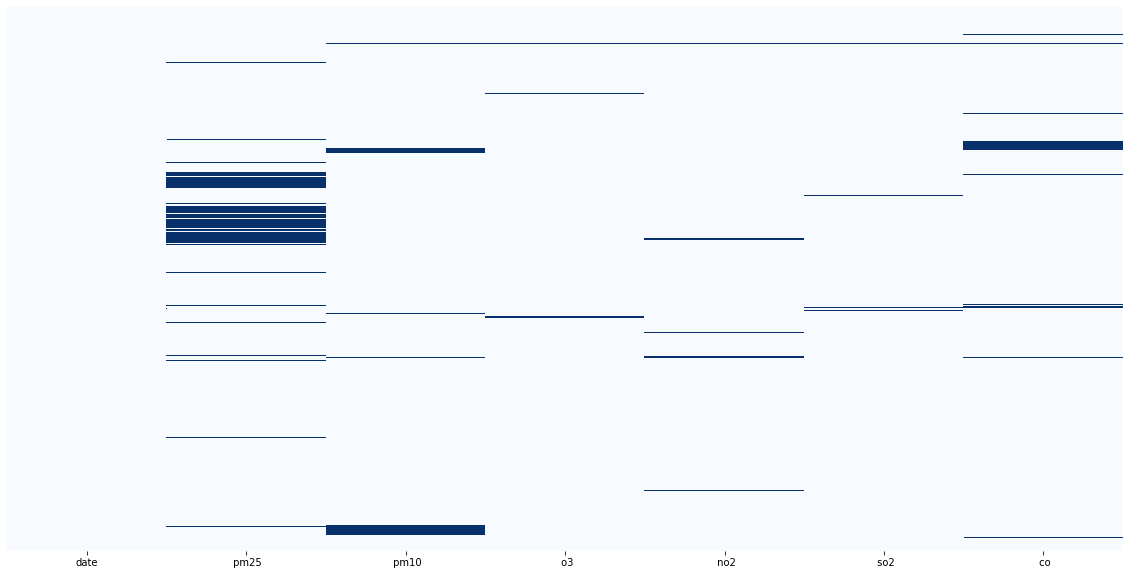

In [ ]:
sns.heatmap(df1.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [ ]:
df1.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [ ]:
df3=df1

**DROPPING NULL VALUES AND FINDING PATTERNS**

In [ ]:
df4=df3.dropna()

In [ ]:
df4.isna().sum()

date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64

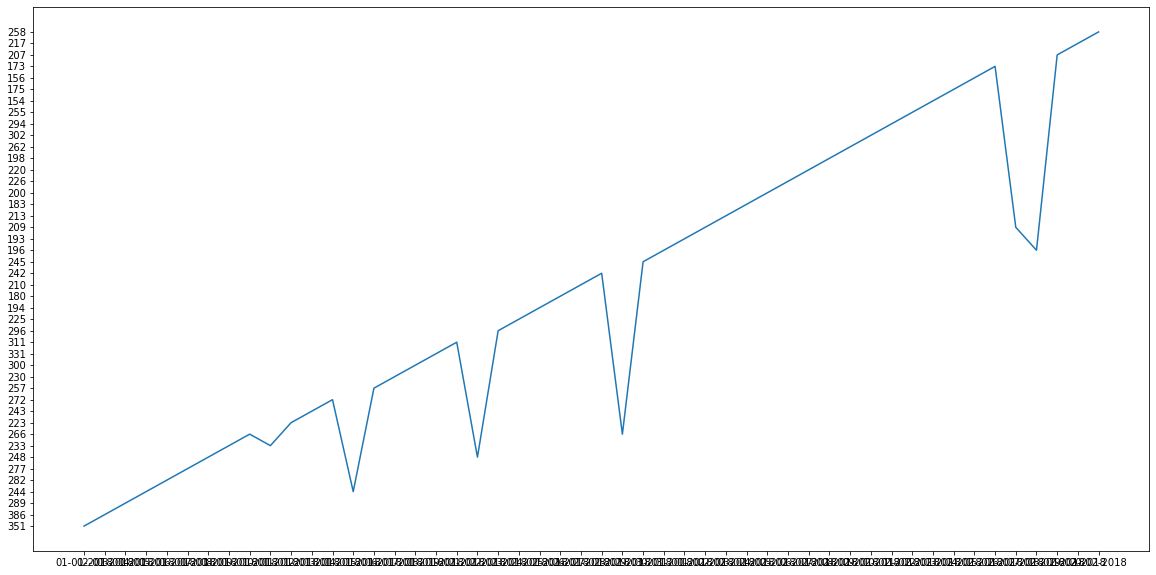

In [ ]:
matplotlib.pyplot.plot(df4['date'][0:50],df4[' pm25'][0:50])

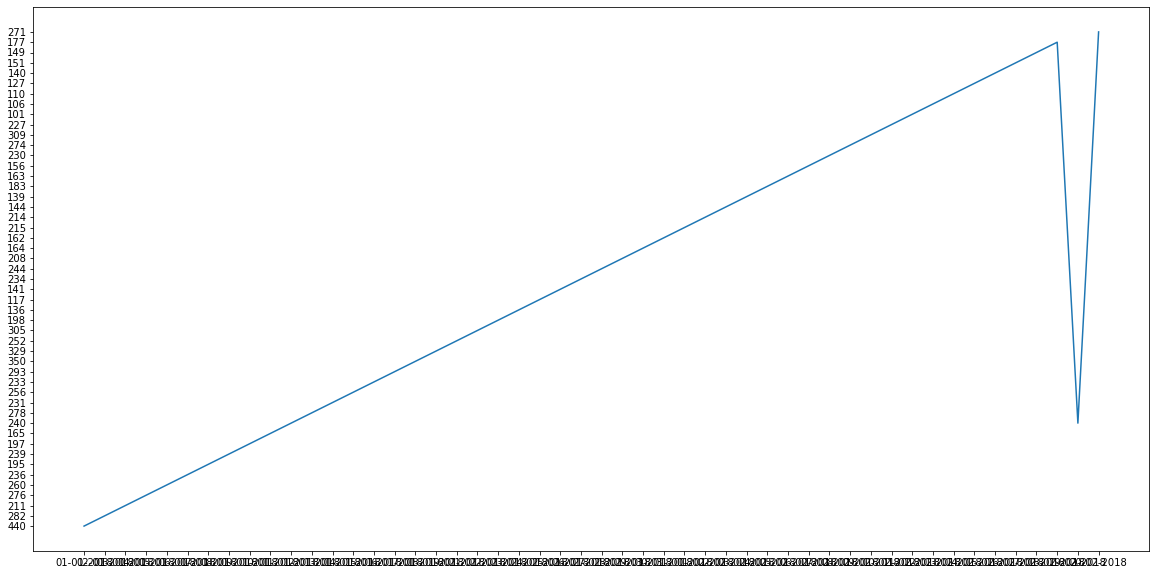

In [ ]:
matplotlib.pyplot.plot(df4['date'][0:50],df4[' pm10'][0:50])

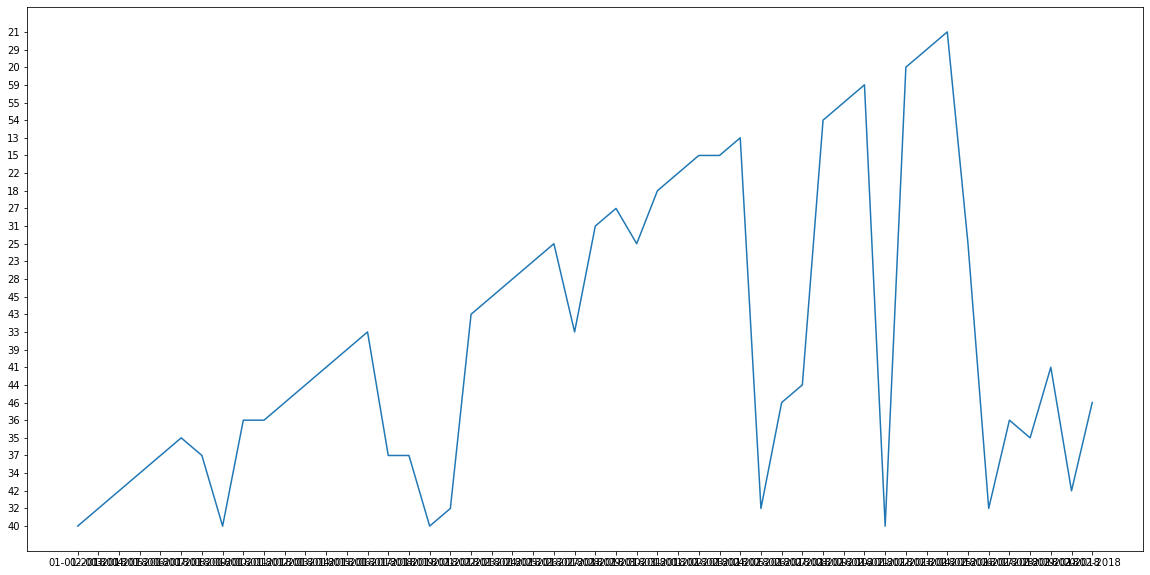

In [ ]:
matplotlib.pyplot.plot(df4['date'][0:50],df4[' no2'][0:50])

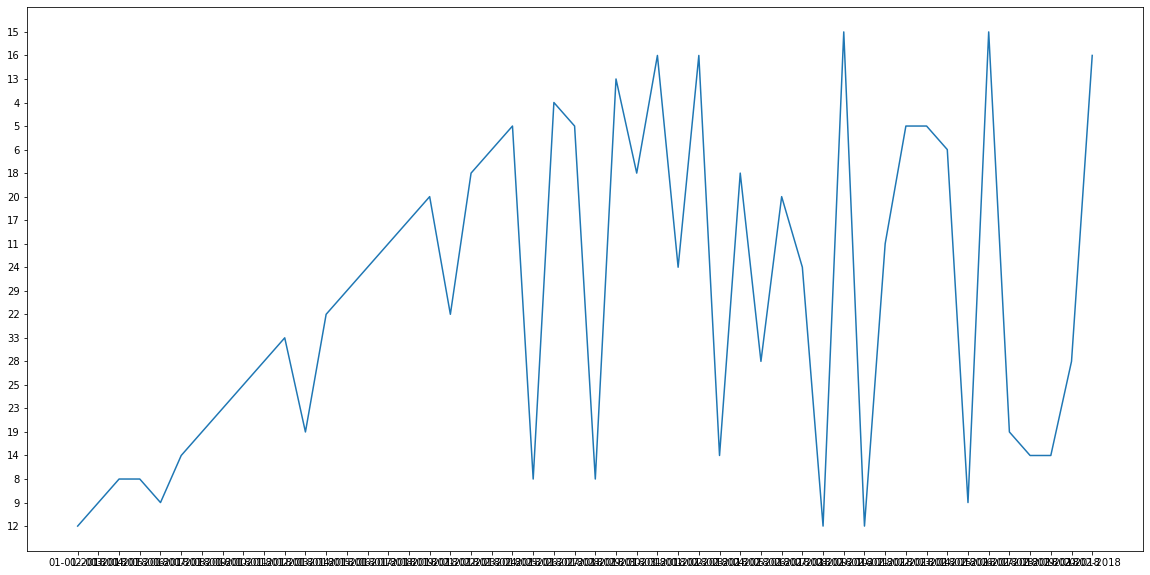

In [ ]:
matplotlib.pyplot.plot(df4['date'][0:50],df4[' so2'][0:50])

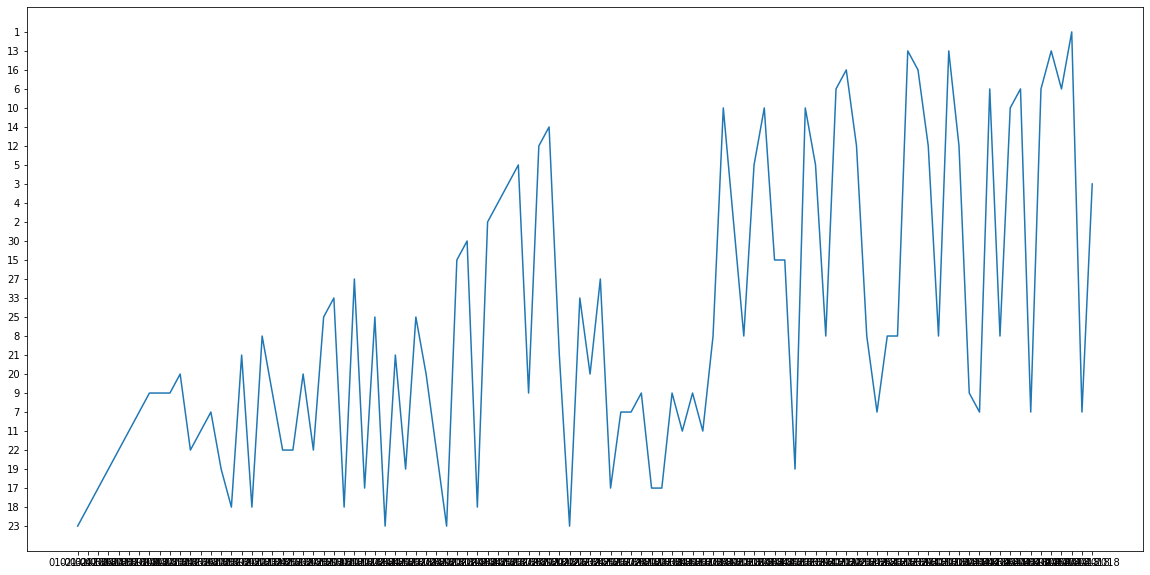

In [ ]:
matplotlib.pyplot.plot(df4['date'][0:100],df4[' co'][0:100])

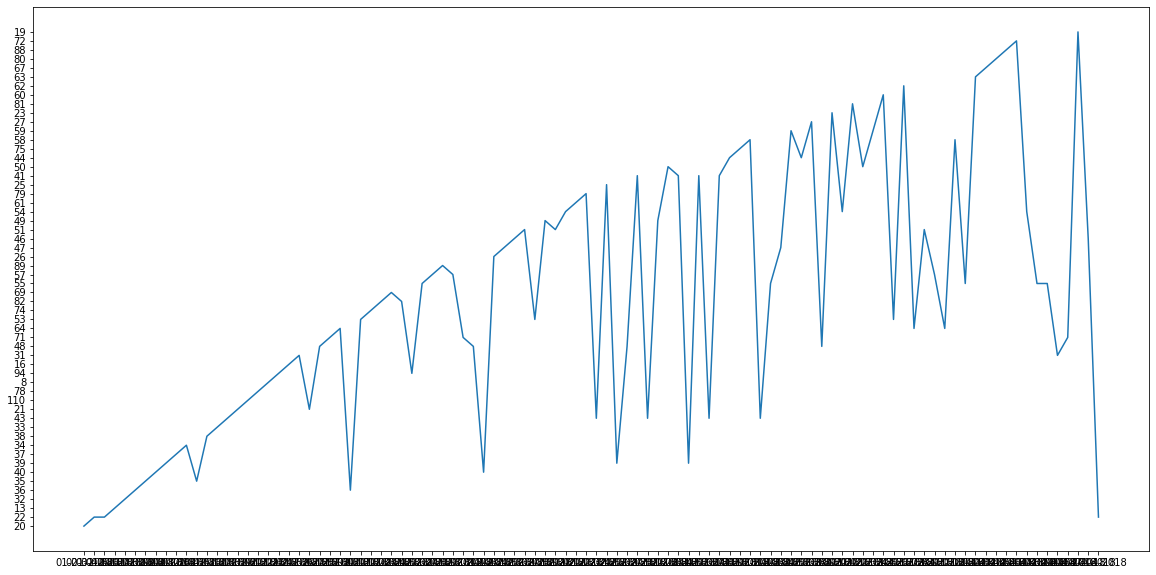

In [ ]:
matplotlib.pyplot.plot(df4['date'][0:100],df4[' o3'][0:100])

**FILLING NULL VALUES USING K NEAREST NEIGHBOURS**

In [ ]:
feature_cols = [col for col in df3.columns if col not in ['date']]
knn_imputer = KNNImputer(n_neighbors=10)
df3[feature_cols] = knn_imputer.fit_transform(df3[feature_cols])

In [ ]:
df3.isna().sum()

date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64

In [ ]:
df3

date   pm25   pm10     o3   no2   so2     co
0     01-01-2018  351.0  440.0  20.0   40.0  12.0  23.0 
1     02-01-2018  386.0  282.0  22.0   32.0  9.0   18.0 
2     03-01-2018  289.0  211.0  22.0   42.0  8.0   17.0 
3     04-01-2018  244.0  276.0  13.0   34.0  8.0   19.0 
4     05-01-2018  282.0  260.0  32.0   37.0  9.0   22.0 
5     06-01-2018  277.0  236.0  36.0   35.0  14.0  11.0 
6     07-01-2018  248.0  195.0  35.0   37.0  19.0  7.0  
7     08-01-2018  233.0  239.0  40.0   40.0  23.0  9.0  
8     09-01-2018  266.0  197.0  39.0   36.0  25.0  9.0  
9     10-01-2018  233.0  165.0  37.0   36.0  28.0  9.0  
10    11-01-2018  223.0  240.0  34.0   46.0  33.0  20.0 
11    12-01-2018  243.0  278.0  35.0   44.0  19.0  22.0 
12    13-01-2018  272.0  231.0  38.0   41.0  22.0  11.0 
13    14-01-2018  244.0  256.0  33.0   39.0  29.0  7.0  
14    15-01-2018  257.0  233.0  43.0   33.0  24.0  19.0 
15    16-01-2018  230.0  293.0  21.0   37.0  11.0  18.0 
16    17-01-2018  300.0  350.0  110.0  37.0  17.0  21.0 
17    18-01-2018  331.0  329.0  78.0   40.0  20.0  18.0 
18    19-01-2018  311.0  252.0  8.0    32.0  22.0  8.0  
19    20-01-2018  262.0  225.0  60.0   43.0  23.0  15.7 
20    21-01-2018  248.0  305.0  94.0   43.0  18.0  9.0  
21    22-01-2018  296.0  198.0  16.0   45.0  6.0   22.0 
22    23-01-2018  225.0  136.0  31.0   28.0  5.0   22.0 
23    24-01-2018  194.0  117.0  21.0   23.0  8.0   20.0 
24    25-01-2018  180.0  141.0  48.0   25.0  4.0   22.0 
25    26-01-2018  210.0  234.0  71.0   33.0  5.0   25.0 
26    27-01-2018  242.0  244.0  64.0   31.0  8.0   33.0 
27    28-01-2018  266.0  208.0  36.0   27.0  13.0  18.0 
28    29-01-2018  245.0  164.0  53.0   25.0  18.0  27.0 
29    30-01-2018  196.0  162.0  74.0   18.0  16.0  17.0 
30    31-01-2018  193.0  215.0  82.0   22.0  24.0  25.0 
31    01-02-2018  209.0  214.0  69.0   15.0  16.0  23.0 
32    02-02-2018  213.0  144.0  82.0   15.0  14.0  21.0 
33    03-02-2018  183.0  139.0  94.0   13.0  18.0  19.0 
34    04-02-2018  200.0  183.0  55.0   32.0  28.0  25.0 
35    05-02-2018  226.0  163.0  57.0   46.0  20.0  20.0 
36    06-02-2018  220.0  156.0  89.0   44.0  24.0  22.0 
37    07-02-2018  198.0  230.0  57.0   54.0  12.0  23.0 
38    08-02-2018  262.0  274.0  71.0   55.0  15.0  15.0 
39    09-02-2018  302.0  309.0  48.0   59.0  12.0  30.0 
40    10-02-2018  294.0  227.0  40.0   40.0  11.0  18.0 
41    11-02-2018  255.0  101.0  26.0   20.0  5.0   2.0  
42    12-02-2018  154.0  106.0  47.0   29.0  5.0   4.0  
43    13-02-2018  175.0  110.0  46.0   21.0  6.0   3.0  
44    14-02-2018  156.0  127.0  51.0   25.0  9.0   5.0  
45    15-02-2018  173.0  140.0  53.0   32.0  15.0  9.0  
46    16-02-2018  209.0  151.0  49.0   36.0  19.0  12.0 
47    17-02-2018  196.0  149.0  51.0   35.0  14.0  14.0 
48    18-02-2018  207.0  177.0  54.0   41.0  14.0  21.0 
49    19-02-2018  217.0  240.0  61.0   42.0  28.0  23.0 
50    20-02-2018  258.0  271.0  79.0   46.0  16.0  33.0 
51    21-02-2018  243.0  236.0  43.0   41.0  20.0  20.0 
52    22-02-2018  230.0  243.0  25.0   54.0  16.0  27.0 
53    23-02-2018  225.0  243.0  39.0   43.0  11.0  17.0 
54    24-02-2018  240.0  133.0  48.0   26.0  13.0  7.0  
55    25-02-2018  180.0  133.0  41.0   20.0  9.0   7.0  
56    26-02-2018  157.0  114.0  43.0   32.0  7.0   9.0  
57    27-02-2018  164.0  166.0  49.0   39.0  19.0  17.0 
58    28-02-2018  212.0  167.0  50.0   44.0  18.0  17.0 
59    01-03-2018  193.0  149.0  41.0   42.0  9.0   9.0  
60    02-03-2018  201.0  126.0  39.0   36.0  15.0  11.0 
61    03-03-2018  176.0  118.0  41.0   32.0  12.0  9.0  
62    04-03-2018  154.0  116.0  43.0   33.0  13.0  11.0 
63    05-03-2018  153.0  112.0  41.0   33.0  15.0  8.0  
64    06-03-2018  148.0  123.0  44.0   42.0  17.0  10.0 
65    07-03-2018  167.0  158.0  75.0   51.0  11.0  2.0  
66    08-03-2018  191.0  164.0  58.0   36.0  19.0  8.0  
67    09-03-2018  197.0  106.0  43.0   32.0  14.0  5.0  
68    10-03-2018  153.0  115.0  55.0   32.0  19.0  10.0 
69    11-03-2018  168.

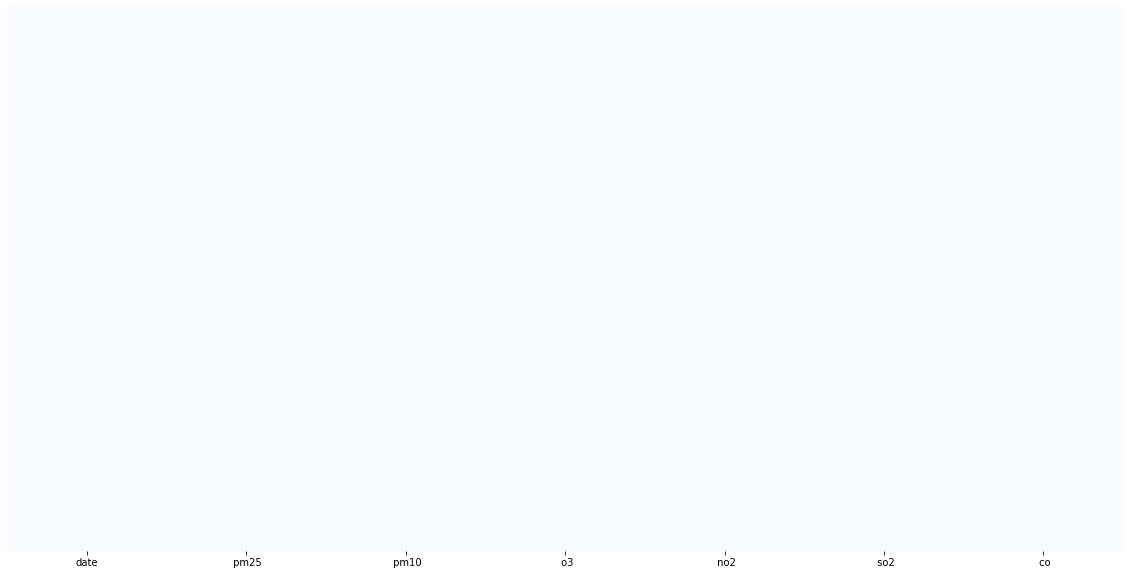

In [ ]:
sns.heatmap(df3.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [ ]:
df3.head()

date   pm25   pm10    o3   no2   so2    co
0  01-01-2018  351.0  440.0  20.0  40.0  12.0  23.0
1  02-01-2018  386.0  282.0  22.0  32.0  9.0   18.0
2  03-01-2018  289.0  211.0  22.0  42.0  8.0   17.0
3  04-01-2018  244.0  276.0  13.0  34.0  8.0   19.0
4  05-01-2018  282.0  260.0  32.0  37.0  9.0   22.0

**CREATING A COLUMN AQI USING MAX OPERATOR**

In [ ]:
df5=df3[[ ' pm25',' pm10',' o3',' no2',' so2', ' co']]

In [ ]:
df3['AQI']=df5.max(axis=1)

In [ ]:
df3.head()

date   pm25   pm10    o3   no2   so2    co    AQI
0  01-01-2018  351.0  440.0  20.0  40.0  12.0  23.0  440.0
1  02-01-2018  386.0  282.0  22.0  32.0  9.0   18.0  386.0
2  03-01-2018  289.0  211.0  22.0  42.0  8.0   17.0  289.0
3  04-01-2018  244.0  276.0  13.0  34.0  8.0   19.0  276.0
4  05-01-2018  282.0  260.0  32.0  37.0  9.0   22.0  282.0

In [ ]:
df3['date']=pd.to_datetime(df3['date']) 
df3['date']=pd.to_numeric(df3['date']) 

**ASSIGNING INDEPENDENT AND DEPENDENT VALUES TO X AND Y**

In [ ]:
X = df3[[' pm25',' pm10',' o3',' no2',' so2',' co',]]
Y = df3[['AQI']]

In [ ]:
from sklearn.model_selection import train_test_split


**APPLYING TRAIN TEST SPLIT USING 80% AS TRAIN DATA AND 20% AS TEST DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

**TRAINING THE DATA SET  USING DIFFERENT MACHINE LEARNING MODELS AND EVALUATING USING EVALUATION METRICS**

**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train,y_train,)
regression_model.score(X_test,y_test)

0.9349347897491367

In [ ]:
from sklearn import metrics
y_pred = regression_model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 13.880051823073943
MSE: 413.56305101341485
RMSE: 20.336249679166876


**GRADIENT BOOST**

In [ ]:
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error, r2_score
regression_model1=ensemble.GradientBoostingRegressor()
# Fit the data(train the model)
regression_model1.fit(X_train,y_train)
regression_model1.score(X_test,y_test)

0.9847925732823932

In [ ]:
y_pred = regression_model1.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.8242774725885744
MSE: 96.66040833723326
RMSE: 9.831602531491662


**DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
regression_model2=DecisionTreeRegressor()
# Fit the data(train the model)
regression_model2.fit(X_train,y_train)
regression_model2.score(X_test,y_test)

0.9545737705872506

In [ ]:
from sklearn import metrics
y_pred = regression_model2.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.813422818791946
MSE: 288.7351006711409
RMSE: 16.99220705709358


**XG BOOST**

In [ ]:
import xgboost as xgb

In [ ]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)


[07:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9820329438229165

In [ ]:
y_pred = regressor.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.399600381019131
MSE: 114.20097686114063
RMSE: 10.68648571145541


**RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor()
regressor1.fit(X_train,y_train)
regressor1.score(X_test,y_test)

0.9503717955852664

In [ ]:
y_pred = regressor1.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.336932885906041
MSE: 315.4434075436241
RMSE: 17.76072654886686


**K NEIGHBOURS REGRESSOR**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor2=KNeighborsRegressor(n_neighbors=1)
regressor2.fit(X_train,y_train)
regressor2.score(X_test,y_test)

0.9885178465459052

In [ ]:
y_pred = regressor2.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 5.718791946308725
MSE: 72.98208053691275
RMSE: 8.542955023697171


In [ ]:
ypred1=regressor2.predict(X)

df7=df3[['date']]


In [ ]:
ypred1

array([[440.],
       [386.],
       [296.],
       ...,
       [217.],
       [214.],
       [289.]])

In [ ]:
len(ypred1)

1486

In [ ]:
df7['ypred']=ypred1

In [ ]:
df7.head()

date  ypred
0  1514764800000000000  440.0
1  1517443200000000000  386.0
2  1519862400000000000  296.0
3  1522540800000000000  259.0
4  1525132800000000000  282.0

**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVR
model_svm= SVR(kernel = 'rbf')
model_svm.fit(X_train, y_train)

SVR()

In [ ]:
model_svm.score(X_test,y_test)

0.8681411189647635

In [ ]:
y_pred =model_svm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 13.523277401767062
MSE: 838.112424964058
RMSE: 28.95017141510665


**TIME SERIES FORECASTING USING PROPHET MODEL AND PREDICTING FUTURE VALUES**

In [ ]:
import pystan
import fbprophet


In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 3.9 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640109 sha256=12800bbfe056a67b5b23d54e59502c757d0aa4ccc75cbbe727c2bd2a192f0887
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
import prophet


In [ ]:
df7['date']=pd.to_datetime(df7['date']) 

In [ ]:
df7=df7[['ypred','date']]

In [ ]:
df7.head()


ypred       date
0  440.0 2018-01-01
1  386.0 2018-02-01
2  296.0 2018-03-01
3  259.0 2018-04-01
4  282.0 2018-05-01

In [ ]:
from fbprophet import Prophet

In [ ]:

df7.columns = ['y', 'ds']

In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)    
model = m.fit(df7)


In [ ]:
future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)


In [ ]:
len(forecast)

1851

In [ ]:
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  additive_terms  additive_terms_lower  additive_terms_upper       daily  daily_lower  daily_upper    weekly  weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  multiplicative_terms  multiplicative_terms_lower  multiplicative_terms_upper        yhat
0    2018-01-01  392.001201  123.328854  444.182802  392.001201   392.001201  -99.332186      -99.332186            -99.332186            -191.021773 -191.021773  -191.021773   1.128850  1.128850      1.128850      90.560738  90.560738     90.560738     0.0                   0.0                         0.0                         292.669015
1    2018-01-02  392.022621  129.727428  448.168165  392.022621   392.022621  -102.780519     -102.780519           -102.780519           -191.021773 -191.021773  -191.021773   0.185888  0.185888      0.185888      88.055366  88.055366     88.055366     0.0                   0.0                         0.0                         289.242101
2    2018-01-03  392.044041  118.230950  452.516566  392.044041   392.044041  -104.756474     -104.756474           -104.756474           -191.021773 -191.021773  -191.021773   0.937284  0.937284      0.937284      85.328015  85.328015     85.328015     0.0                   0.0                         0.0                         287.287566
3    2018-01-04  392.065461  131.239513  449.071041  392.065461   392.065461  -104.818571     -104.818571           -104.818571           -191.021773 -191.021773  -191.021773   3.759564  3.759564      3.759564      82.443638  82.443638     82.443638     0.0                   0.0                         0.0                         287.246889
4    2018-01-05  392.086881  134.162801  451.387162  392.086881   392.086881  -110.155610     -110.155610           -110.155610           -191.021773 -191.021773  -191.021773   1.398500  1.398500      1.398500      79.467663  79.467663     79.467663     0.0                   0.0                         0.0                         281.931271
5    2018-01-06  392.108301  105.199565  435.163248  392.108301   392.108301  -119.296555     -119.296555           -119.296555           -191.021773 -191.021773  -191.021773  -4.739006 -4.739006     -4.739006      76.464225  76.464225     76.464225     0.0                   0.0                         0.0                         272.811746
6    2018-01-07  392.129721  123.442124  446.485189  392.129721   392.129721  -120.198414     -120.198414           -120.198414           -191.021773 -191.021773  -191.021773  -2.671080 -2.671080     -2.671080      73.494439  73.494439     73.494439     0.0                   0.0                         0.0                         271.931307
7    2018-01-08  392.151141  121.103534  439.148141  392.151141   392.151141  -119.278130     -119.278130           -119.278130           -191.021773 -191.021773  -191.021773   1.128850  1.128850      1.128850      70.614794  70.614794     70.614794     0.0                   0.0                         0.0                         272.873011
8    2018-01-09  392.172561  107.889211  439.792693  392.172561   392.172561  -122.960195     -122.960195           -122.960195           -191.021773 -191.021773  -191.021773   0.185888  0.185888      0.185888      67.875690  67.875690     67.875690     0.0                   0.0                         0.0                         269.212365
9    2018-01-10  392.193981  116.216106  428.632468  392.193981   392.193981  -124.764318     -124.764318           -124.764318           -191.021773 -191.021773  -191.021773   0.937284  0.937284      0.937284      65.320171  65.320171     65.320171     0.0                   0.0                         0.0                         267.429662
10   2018-01-11  392.215401  97.143437   414.765539  392.215401   392.215401  -124.279323     -124.279323           -124.279323           -191.021773 -191.021773  -191.021773   3.759564  3.759564      3.759564      62.982885  62.982885     

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper','trend']].tail())

             ds        yhat  yhat_lower  yhat_upper       trend
1846 2023-11-27  239.515681  76.392556   412.100465  395.406952
1847 2023-11-28  237.210368  85.546040   390.767743  395.441714
1848 2023-11-29  236.851280  69.001285   392.674675  395.476475
1849 2023-11-30  238.867045  90.447937   395.168408  395.511237
1850 2023-12-01  236.050326  64.464175   395.788294  395.545998


In [ ]:
import math
forecast['yhat']=forecast['yhat'].astype(float)
forecast['yhat']=forecast['yhat'].apply(np.ceil)

In [ ]:

print(forecast[['ds','yhat']].tail(10))

             ds   yhat
1841 2023-11-22  248.0
1842 2023-11-23  249.0
1843 2023-11-24  245.0
1844 2023-11-25  237.0
1845 2023-11-26  238.0
1846 2023-11-27  240.0
1847 2023-11-28  238.0
1848 2023-11-29  237.0
1849 2023-11-30  239.0
1850 2023-12-01  237.0


In [ ]:
x2=forecast['ds']
y2=forecast['yhat']


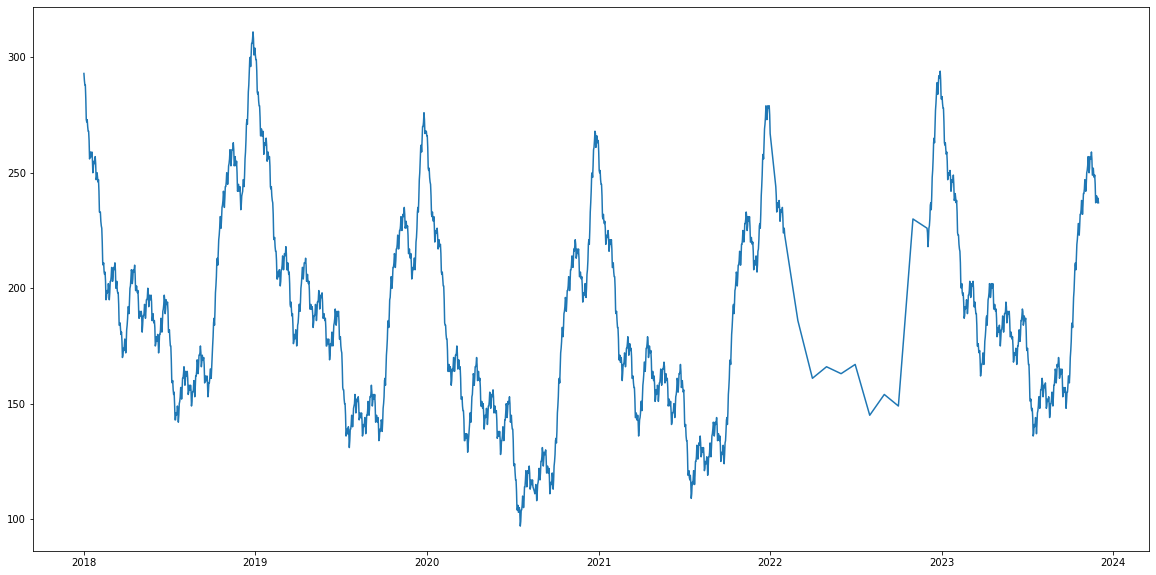

In [ ]:
plt.plot(x2,y2)

**CASE 2:INCLUDING METEROLOGICAL PARAMETERS**

**READING RAW DATA FILE**

In [ ]:
dfs =pd.read_csv('/content/drive/MyDrive/project/r.k.-puram, delhi, delhi, india-air-quality.csv',encoding= 'unicode_escape')

In [ ]:
len(dfs), len(dfs.columns)

(1486, 10)

In [ ]:
dfs.head()

date  pm25  pm10  o3  no2  so2  co    T2M   RH2M  WS10M
0  01-01-2018  351   440   20  40   12   23  12.07  34.56  2.41 
1  02-01-2018  386   282   22  32   9    18  10.98  38.50  2.58 
2  03-01-2018  289   211   22  42   8    17  11.01  39.62  3.02 
3  04-01-2018  244   276   13  34   8    19  12.51  33.56  2.09 
4  05-01-2018  282   260   32  37   9    22  13.02  30.94  1.95

In [ ]:
dfs1= dfs.replace(r'^\s*$', np.NaN, regex=True)

In [ ]:
dfs1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1486 non-null   object 
 1    pm25   1328 non-null   object 
 2    pm10   1435 non-null   object 
 3    o3     1470 non-null   object 
 4    no2    1464 non-null   object 
 5    so2    1469 non-null   object 
 6    co     1429 non-null   object 
 7   T2M     1486 non-null   float64
 8   RH2M    1486 non-null   float64
 9   WS10M   1486 non-null   float64
dtypes: float64(3), object(7)
memory usage: 116.2+ KB


**FINDING NULL VALUES**

In [ ]:
dfs1.isnull().sum()

date     0  
 pm25    158
 pm10    51 
 o3      16 
 no2     22 
 so2     17 
 co      57 
T2M      0  
RH2M     0  
WS10M    0  
dtype: int64

In [ ]:
dfs1.isna()

date   pm25   pm10     o3    no2    so2     co    T2M   RH2M  WS10M
0     False  False  False  False  False  False  False  False  False  False
1     False  False  False  False  False  False  False  False  False  False
2     False  False  False  False  False  False  False  False  False  False
3     False  False  False  False  False  False  False  False  False  False
4     False  False  False  False  False  False  False  False  False  False
5     False  False  False  False  False  False  False  False  False  False
6     False  False  False  False  False  False  False  False  False  False
7     False  False  False  False  False  False  False  False  False  False
8     False  False  False  False  False  False  False  False  False  False
9     False  False  False  False  False  False  False  False  False  False
10    False  False  False  False  False  False  False  False  False  False
11    False  False  False  False  False  False  False  False  False  False
12    False  False  False  False  False  False  False  False  False  False
13    False  False  False  False  False  False  False  False  False  False
14    False  False  False  False  False  False  False  False  False  False
15    False  False  False  False  False  False  False  False  False  False
16    False  False  False  False  False  False  False  False  False  False
17    False  False  False  False  False  False  False  False  False  False
18    False  False  False  False  False  False  False  False  False  False
19    False  False  False  False  False  False  True   False  False  False
20    False  False  False  False  False  False  False  False  False  False
21    False  False  False  False  False  False  False  False  False  False
22    False  False  False  False  False  False  False  False  False  False
23    False  False  False  False  False  False  False  False  False  False
24    False  False  False  False  False  False  False  False  False  False
25    False  False  False  False  False  False  False  False  False  False
26    False  False  False  False  False  False  False  False  False  False
27    False  False  False  False  False  False  False  False  False  False
28    False  False  False  False  False  False  False  False  False  False
29    False  False  False  False  False  False  False  False  False  False
30    False  False  False  False  False  False  False  False  False  False
31    False  False  False  False  False  False  False  False  False  False
32    False  False  False  False  False  False  False  False  False  False
33    False  False  False  False  False  False  False  False  False  False
34    False  False  False  False  False  False  False  False  False  False
35    False  False  False  False  False  False  False  False  False  False
36    False  False  False  False  False  False  False  False  False  False
37    False  False  False  False  False  False  False  False  False  False
38    False  False  False  False  False  False  False  False  False  False
39    False  False  False  False  False  False  False  False  False  False
40    False  False  False  False  False  False  False  False  False  False
41    False  False  False  False  False  False  False  False  False  False
42    False  False  False  False  False  False  False  False  False  False
43    False  False  False  False  False  False  False  False  False  False
44    False  False  False  False  False  False  False  False  False  False
45    False  False  False  False  False  False  False  False  False  False
46    False  False  False  False  False  False  False  False  False  False
47    False  False  False  False  False  False  False  False  False  False
48    False  False  False  False  False  False  False  False  False  False
49    False  False  False  False  False  False  False  False  False  False
50    False  False  False  False  False  False  False  False  False  False
51    False  False  False  False  False  False  False  False  False  False
52    False  False  False  False

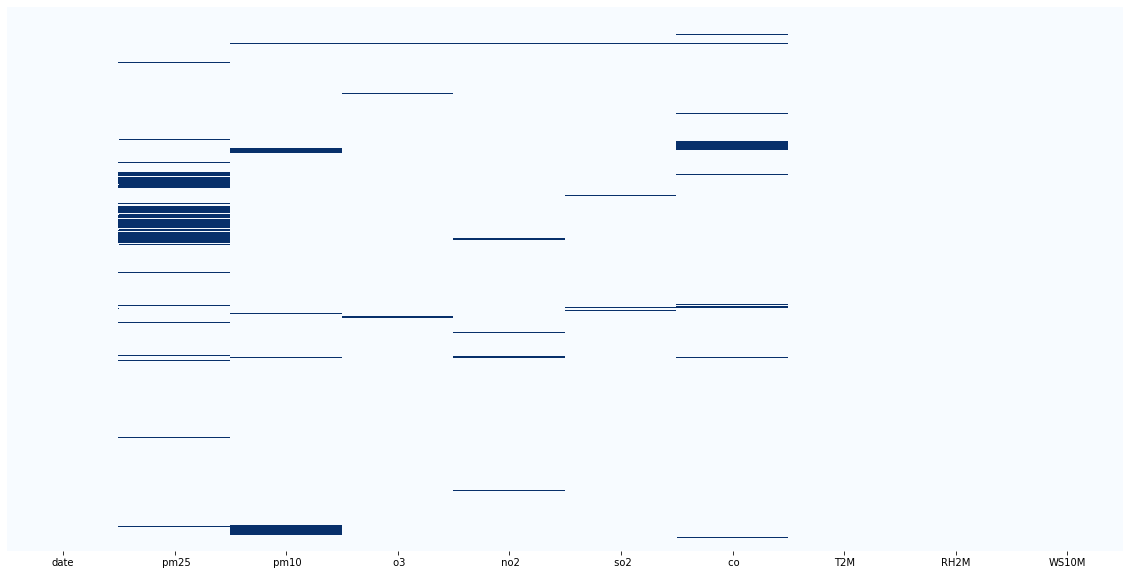

In [ ]:
sns.heatmap(dfs1.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=dfs.columns);

In [ ]:
dfs1.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co', 'T2M', 'RH2M',
       'WS10M'],
      dtype='object')

In [ ]:
dfs3=dfs1

**FILLING NULL VALUES**

In [ ]:
feature_cols = [col for col in dfs3.columns if col not in ['date']]
knn_imputer = KNNImputer(n_neighbors=10)
dfs3[feature_cols] = knn_imputer.fit_transform(dfs3[feature_cols])

In [ ]:
dfs3.isna().sum()

date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
T2M      0
RH2M     0
WS10M    0
dtype: int64

In [ ]:
dfs3

date   pm25   pm10     o3   no2   so2     co    T2M   RH2M  WS10M
0     01-01-2018  351.0  440.0  20.0   40.0  12.0  23.0   12.07  34.56  2.41 
1     02-01-2018  386.0  282.0  22.0   32.0  9.0   18.0   10.98  38.50  2.58 
2     03-01-2018  289.0  211.0  22.0   42.0  8.0   17.0   11.01  39.62  3.02 
3     04-01-2018  244.0  276.0  13.0   34.0  8.0   19.0   12.51  33.56  2.09 
4     05-01-2018  282.0  260.0  32.0   37.0  9.0   22.0   13.02  30.94  1.95 
5     06-01-2018  277.0  236.0  36.0   35.0  14.0  11.0   11.71  40.50  3.15 
6     07-01-2018  248.0  195.0  35.0   37.0  19.0  7.0    11.65  41.19  3.80 
7     08-01-2018  233.0  239.0  40.0   40.0  23.0  9.0    11.98  38.25  3.07 
8     09-01-2018  266.0  197.0  39.0   36.0  25.0  9.0    11.94  38.06  3.41 
9     10-01-2018  233.0  165.0  37.0   36.0  28.0  9.0    12.55  32.69  4.23 
10    11-01-2018  223.0  240.0  34.0   46.0  33.0  20.0   13.25  29.88  4.14 
11    12-01-2018  243.0  278.0  35.0   44.0  19.0  22.0   15.13  29.00  3.35 
12    13-01-2018  272.0  231.0  38.0   41.0  22.0  11.0   14.88  32.38  2.88 
13    14-01-2018  244.0  256.0  33.0   39.0  29.0  7.0    14.12  31.38  2.86 
14    15-01-2018  257.0  233.0  43.0   33.0  24.0  19.0   13.23  31.31  4.02 
15    16-01-2018  230.0  293.0  21.0   37.0  11.0  18.0   14.54  24.56  3.18 
16    17-01-2018  300.0  350.0  110.0  37.0  17.0  21.0   15.02  27.00  2.11 
17    18-01-2018  331.0  329.0  78.0   40.0  20.0  18.0   16.60  26.75  2.53 
18    19-01-2018  311.0  252.0  8.0    32.0  22.0  8.0    15.33  33.81  3.34 
19    20-01-2018  262.0  225.0  60.0   43.0  23.0  15.7   13.98  26.31  3.80 
20    21-01-2018  248.0  305.0  94.0   43.0  18.0  9.0    14.24  24.44  2.39 
21    22-01-2018  296.0  198.0  16.0   45.0  6.0   22.0   15.60  21.62  1.70 
22    23-01-2018  225.0  136.0  31.0   28.0  5.0   22.0   12.98  41.81  3.03 
23    24-01-2018  194.0  117.0  21.0   23.0  8.0   20.0   12.18  70.50  2.63 
24    25-01-2018  180.0  141.0  48.0   25.0  4.0   22.0   12.37  60.19  3.76 
25    26-01-2018  210.0  234.0  71.0   33.0  5.0   25.0   12.95  42.25  2.98 
26    27-01-2018  242.0  244.0  64.0   31.0  8.0   33.0   12.25  37.44  2.90 
27    28-01-2018  266.0  208.0  36.0   27.0  13.0  18.0   13.32  31.81  3.03 
28    29-01-2018  245.0  164.0  53.0   25.0  18.0  27.0   14.39  30.38  3.85 
29    30-01-2018  196.0  162.0  74.0   18.0  16.0  17.0   17.75  26.94  5.02 
30    31-01-2018  193.0  215.0  82.0   22.0  24.0  25.0   17.86  29.81  5.55 
31    01-02-2018  209.0  214.0  69.0   15.0  16.0  23.0   18.92  32.69  3.60 
32    02-02-2018  213.0  144.0  82.0   15.0  14.0  21.0   18.51  37.00  3.22 
33    03-02-2018  183.0  139.0  94.0   13.0  18.0  19.0   17.51  28.50  2.85 
34    04-02-2018  200.0  183.0  55.0   32.0  28.0  25.0   15.27  23.38  3.64 
35    05-02-2018  226.0  163.0  57.0   46.0  20.0  20.0   15.94  15.56  2.81 
36    06-02-2018  220.0  156.0  89.0   44.0  24.0  22.0   16.92  14.94  3.30 
37    07-02-2018  198.0  230.0  57.0   54.0  12.0  23.0   15.37  15.81  4.15 
38    08-02-2018  262.0  274.0  71.0   55.0  15.0  15.0   15.69  14.31  2.98 
39    09-02-2018  302.0  309.0  48.0   59.0  12.0  30.0   15.44  17.25  3.28 
40    10-02-2018  294.0  227.0  40.0   40.0  11.0  18.0   17.37  17.19  2.23 
41    11-02-2018  255.0  101.0  26.0   20.0  5.0   2.0    19.17  19.31  3.58 
42    12-02-2018  154.0  106.0  47.0   29.0  5.0   4.0    17.00  61.12  4.27 
43    13-02-2018  175.0  110.0  46.0   21.0  6.0   3.0    16.69  61.56  2.48 
44    14-02-2018  156.0  127.0  51.0   25.0  9.0   5.0    15.98  41.62  4.57 
45    15-02-2018  173.0  140.0  53.0   32.0  15.0  9.0    17.39  44.81  4.62 
46    16-02-2018  209.0  151.0  49.0   36.0  19.0  12.0   18.72  43.25  3.68 
47    17-02-2018  196.0  149.0  51.0   35.0  14.0  14.0   19.84  34.19  4.11 
48    18-02-2018  207.0  177.0  54.0   41.0  14.0  21.0   18.94  23.38  3.50 
49    19-02-2018  217.0  240.0  61.0   42.0  28.0  23.0   19.65  19.25  2.68 
50    20-02-2018  258.0  271.0  79

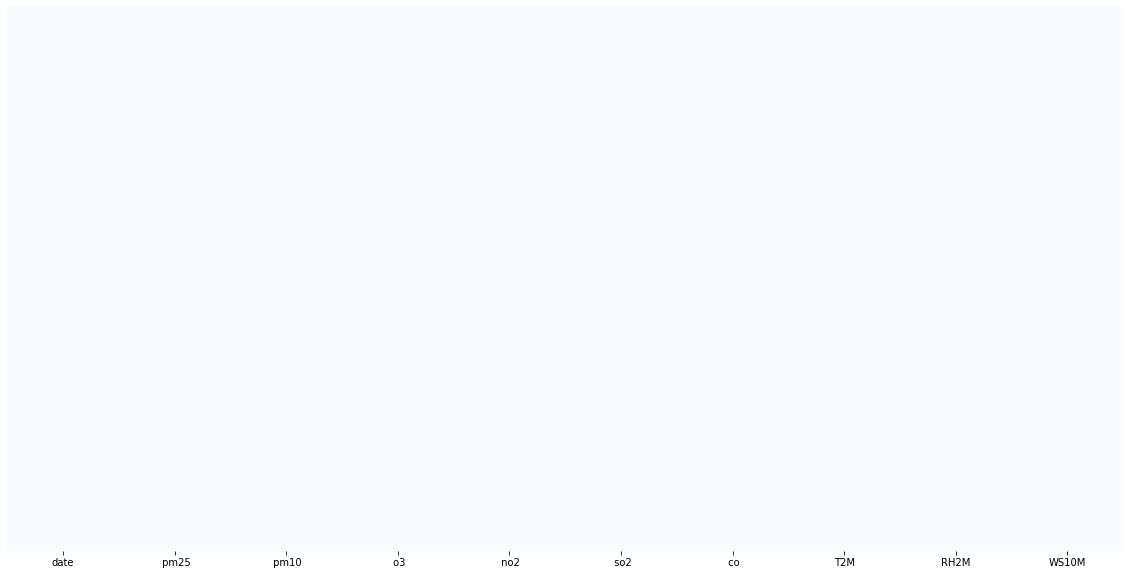

In [ ]:
sns.heatmap(dfs3.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=dfs.columns);

In [ ]:
dfs3.head()

date   pm25   pm10    o3   no2   so2    co    T2M   RH2M  WS10M
0  01-01-2018  351.0  440.0  20.0  40.0  12.0  23.0  12.07  34.56  2.41 
1  02-01-2018  386.0  282.0  22.0  32.0  9.0   18.0  10.98  38.50  2.58 
2  03-01-2018  289.0  211.0  22.0  42.0  8.0   17.0  11.01  39.62  3.02 
3  04-01-2018  244.0  276.0  13.0  34.0  8.0   19.0  12.51  33.56  2.09 
4  05-01-2018  282.0  260.0  32.0  37.0  9.0   22.0  13.02  30.94  1.95

In [ ]:
dfs5=dfs3[[' pm25',' pm10',' o3',' no2',' so2',' co']]

In [ ]:
dfs5.head()

pm25   pm10    o3   no2   so2    co
0  351.0  440.0  20.0  40.0  12.0  23.0
1  386.0  282.0  22.0  32.0  9.0   18.0
2  289.0  211.0  22.0  42.0  8.0   17.0
3  244.0  276.0  13.0  34.0  8.0   19.0
4  282.0  260.0  32.0  37.0  9.0   22.0

**CREATING AQI COLUMN USING MAX OPERATOR**

In [ ]:
dfs3['AQI']=df5.max(axis=1)

In [ ]:
dfs3.head()

date   pm25   pm10    o3   no2   so2    co    T2M   RH2M  WS10M    AQI
0  01-01-2018  351.0  440.0  20.0  40.0  12.0  23.0  12.07  34.56  2.41   440.0
1  02-01-2018  386.0  282.0  22.0  32.0  9.0   18.0  10.98  38.50  2.58   386.0
2  03-01-2018  289.0  211.0  22.0  42.0  8.0   17.0  11.01  39.62  3.02   289.0
3  04-01-2018  244.0  276.0  13.0  34.0  8.0   19.0  12.51  33.56  2.09   276.0
4  05-01-2018  282.0  260.0  32.0  37.0  9.0   22.0  13.02  30.94  1.95   282.0

In [ ]:
dfs3['date']=pd.to_datetime(df3['date']) 
dfs3['date']=pd.to_numeric(df3['date']) 

**ASSIGNING INDEPENDENT AND DEPENDENT VALUES TO X AND Y**

In [ ]:
X = dfs3[[' pm25',' pm10',' o3',' no2',' so2',' co','T2M','RH2M','WS10M']]
Y = dfs3[['AQI']]

In [ ]:
from sklearn.model_selection import train_test_split
df3.dtypes


date     int64  
 pm25    float64
 pm10    float64
 o3      float64
 no2     float64
 so2     float64
 co      float64
AQI      float64
dtype: object

**APPLYING TRAIN TEST SPLIT USING 80% AS TRAIN DATA AND 20% AS TEST DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)


**TRAINING THE DATA SET  USING DIFFERENT MACHINE LEARNING MODELS AND EVALUATING USING EVALUATION METRICS**

**LINEAR REGRESSOR**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train,y_train,)
regression_model.score(X_test,y_test)

0.919824323743465

In [ ]:
from sklearn import metrics
y_pred = regression_model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 16.108374878401577
MSE: 509.6071642875617
RMSE: 22.574480376911485


**GRADIENT BOOST**

In [ ]:
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error, r2_score
regression_model1=ensemble.GradientBoostingRegressor()
# Fit the data(train the model)
regression_model1.fit(X_train,y_train)
regression_model1.score(X_test,y_test)

0.9669611103191162

In [ ]:

y_pred = regression_model1.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7.791844629068862
MSE: 209.99953686218365
RMSE: 14.491360766407814


**DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
regression_model2=DecisionTreeRegressor()
# Fit the data(train the model)
regression_model2.fit(X_train,y_train)
regression_model2.score(X_test,y_test)

0.9323344308025571

In [ ]:
from sklearn import metrics
y_pred = regression_model2.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6.354362416107382
MSE: 430.0912751677853
RMSE: 20.73864207627359


**XG BOOST**

In [ ]:
import xgboost as xgb

In [ ]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)


[07:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9681732117956469

In [ ]:
y_pred = regressor.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.09441952033331
MSE: 202.29526013981376
RMSE: 14.223053826088607


In [ ]:
ypred1=regressor.predict(X)

dfs7=dfs3[['date']]


In [ ]:
ypred1

array([435.66397, 378.2419 , 291.87726, ..., 211.86847, 224.70741,
       289.06366], dtype=float32)

In [ ]:
dfs7['ypred']=ypred1

In [ ]:
dfs7.head()

date       ypred
0  1514764800000000000  435.663971
1  1517443200000000000  378.241913
2  1519862400000000000  291.877258
3  1522540800000000000  276.362671
4  1525132800000000000  284.950531

**RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor()
regressor1.fit(X_train,y_train)
regressor1.score(X_test,y_test)

0.9407178335494468

In [ ]:
y_pred = regressor1.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 5.533355704697986
MSE: 376.80526249664433
RMSE: 19.4114724453516


**K NEIGHBOURS REGRESSOR**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor2=KNeighborsRegressor(n_neighbors=1)
regressor2.fit(X_train,y_train)
regressor2.score(X_test,y_test)

0.9572301601942617

In [ ]:
y_pred = regressor2.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 9.958389261744966
MSE: 271.85073825503355
RMSE: 16.48789672017124


**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVR
model_svm= SVR(kernel = 'rbf')
model_svm.fit(X_train, y_train)

SVR()

In [ ]:
model_svm.score(X_test,y_test)

0.8500408806241294

In [ ]:
y_pred =model_svm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 16.639453502514215
MSE: 953.15992520822
RMSE: 30.873288215028538


In [ ]:
dfs7['date']=pd.to_datetime(dfs7['date']) 

In [ ]:
dfs7=dfs7[['ypred','date']]

In [ ]:
dfs7.head()


ypred       date
0  435.663971 2018-01-01
1  378.241913 2018-02-01
2  291.877258 2018-03-01
3  276.362671 2018-04-01
4  284.950531 2018-05-01

**TIME SERIES FORECASTING USING PROPHET MODEL AND PREDICTING FUTURE VALUES**

In [ ]:
from fbprophet import Prophet

In [ ]:

dfs7.columns = ['y', 'ds']

In [ ]:
m1= Prophet(interval_width=0.95, daily_seasonality=True)
model = m1.fit(dfs7)


In [ ]:
future1 = m1.make_future_dataframe(periods=365,freq='D')
forecast1 = m1.predict(future)


In [ ]:
len(forecast1)

1851

In [ ]:
forecast1

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  additive_terms  additive_terms_lower  additive_terms_upper       daily  daily_lower  daily_upper    weekly  weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  multiplicative_terms  multiplicative_terms_lower  multiplicative_terms_upper        yhat
0    2018-01-01  389.137358  136.852391  455.281669  389.137358   389.137358  -93.827072      -93.827072            -93.827072            -185.295105 -185.295105  -185.295105   0.855639  0.855639      0.855639      90.612394  90.612394     90.612394     0.0                   0.0                         0.0                         295.310286
1    2018-01-02  389.148961  131.793280  453.935848  389.148961   389.148961  -98.295883      -98.295883            -98.295883            -185.295105 -185.295105  -185.295105  -1.109740 -1.109740     -1.109740      88.108962  88.108962     88.108962     0.0                   0.0                         0.0                         290.853079
2    2018-01-03  389.160565  129.278457  442.525248  389.160565   389.160565  -98.094739      -98.094739            -98.094739            -185.295105 -185.295105  -185.295105   1.840235  1.840235      1.840235      85.360131  85.360131     85.360131     0.0                   0.0                         0.0                         291.065826
3    2018-01-04  389.172168  134.020897  443.217688  389.172168   389.172168  -98.209502      -98.209502            -98.209502            -185.295105 -185.295105  -185.295105   4.655292  4.655292      4.655292      82.430311  82.430311     82.430311     0.0                   0.0                         0.0                         290.962666
4    2018-01-05  389.183772  122.741815  455.643875  389.183772   389.183772  -103.709565     -103.709565           -103.709565           -185.295105 -185.295105  -185.295105   2.200426  2.200426      2.200426      79.385115  79.385115     79.385115     0.0                   0.0                         0.0                         285.474207
5    2018-01-06  389.195375  123.067569  441.056540  389.195375   389.195375  -115.320380     -115.320380           -115.320380           -185.295105 -185.295105  -185.295105  -6.314848 -6.314848     -6.314848      76.289573  76.289573     76.289573     0.0                   0.0                         0.0                         273.874995
6    2018-01-07  389.206979  124.627813  434.535929  389.206979   389.206979  -114.215701     -114.215701           -114.215701           -185.295105 -185.295105  -185.295105  -2.127003 -2.127003     -2.127003      73.206406  73.206406     73.206406     0.0                   0.0                         0.0                         274.991277
7    2018-01-08  389.218582  126.591108  434.082822  389.218582   389.218582  -114.245098     -114.245098           -114.245098           -185.295105 -185.295105  -185.295105   0.855639  0.855639      0.855639      70.194367  70.194367     70.194367     0.0                   0.0                         0.0                         274.973484
8    2018-01-09  389.230185  123.289511  433.953888  389.230185   389.230185  -119.098116     -119.098116           -119.098116           -185.295105 -185.295105  -185.295105  -1.109740 -1.109740     -1.109740      67.306729  67.306729     67.306729     0.0                   0.0                         0.0                         270.132070
9    2018-01-10  389.241789  106.940984  424.224369  389.241789   389.241789  -118.864932     -118.864932           -118.864932           -185.295105 -185.295105  -185.295105   1.840235  1.840235      1.840235      64.589937  64.589937     64.589937     0.0                   0.0                         0.0                         270.376857
10   2018-01-11  389.253392  115.923668  429.454238  389.253392   389.253392  -118.557334     -118.557334           -118.557334           -185.295105 -185.295105  -185.295105   4.655292  4.655292      4.655292      62.082480  62.082480     

In [ ]:
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper','trend']].tail())

             ds        yhat  yhat_lower  yhat_upper       trend
1846 2023-11-27  238.830334  87.837682   399.654614  388.020718
1847 2023-11-28  235.501830  78.414463   393.307896  388.053424
1848 2023-11-29  237.315152  83.122606   391.970177  388.086130
1849 2023-11-30  239.272317  82.400326   408.225362  388.118837
1850 2023-12-01  236.286139  81.481215   391.156376  388.151543


In [ ]:
forecast1['yhat']=forecast1['yhat'].astype(float)
forecast1['yhat']=forecast1['yhat'].apply(np.ceil)

In [ ]:
forecast1[['ds','yhat']].tail(10)

ds   yhat
1841 2023-11-22  249.0
1842 2023-11-23  250.0
1843 2023-11-24  246.0
1844 2023-11-25  235.0
1845 2023-11-26  238.0
1846 2023-11-27  239.0
1847 2023-11-28  236.0
1848 2023-11-29  238.0
1849 2023-11-30  240.0
1850 2023-12-01  237.0

In [ ]:
x3=forecast1['ds']
y3=forecast1['yhat']

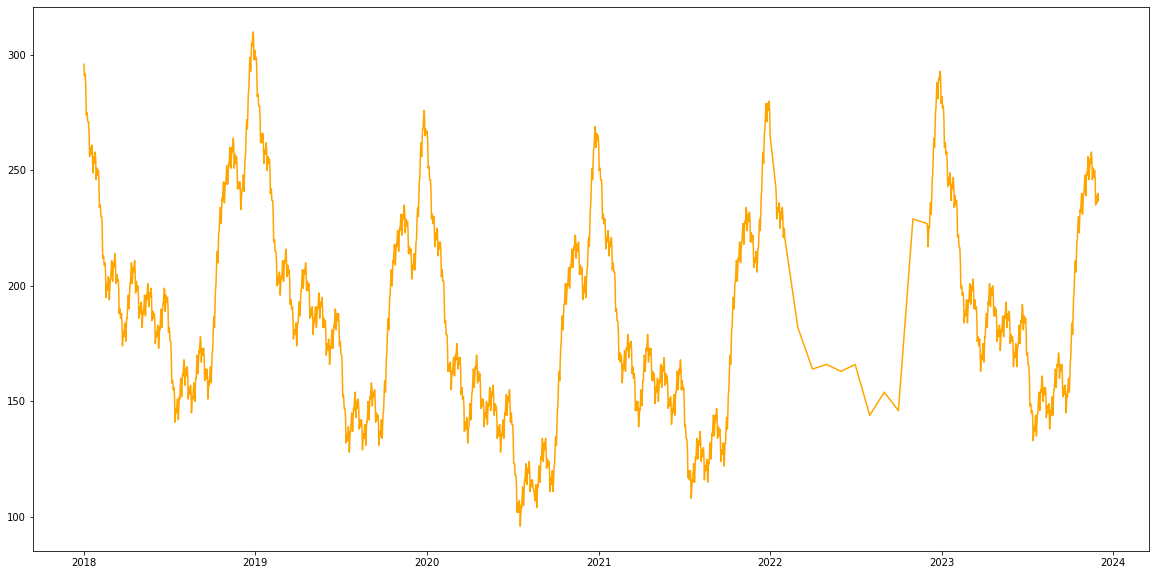

In [ ]:
plt.plot(x3,y3,c='orange')

Text(0, 0.5, 'AQI')

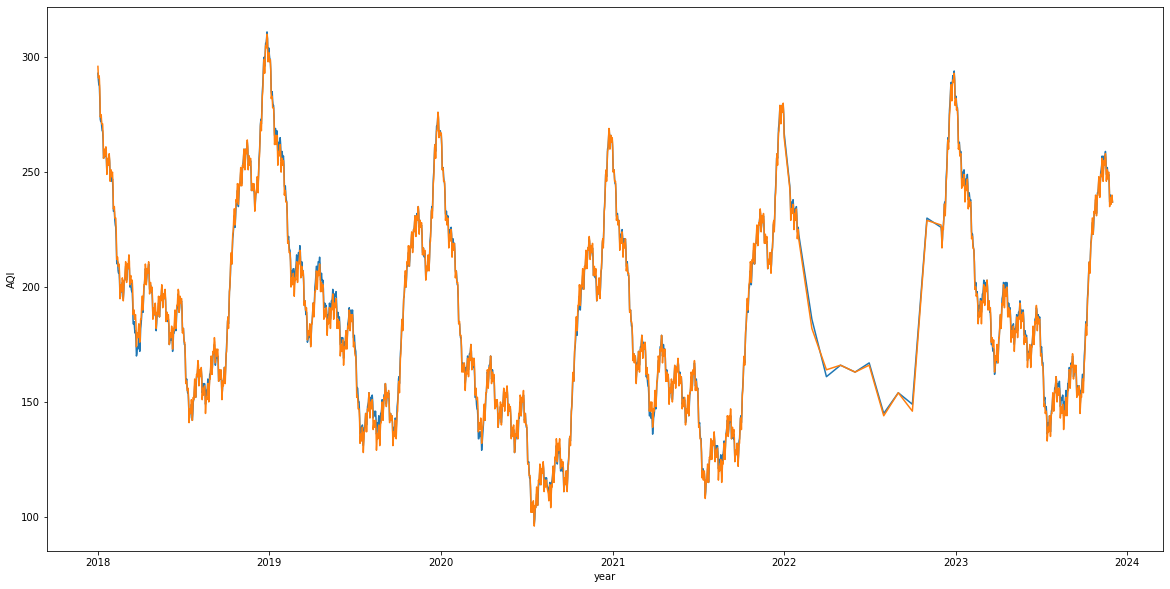

In [ ]:
plt.plot(x2, y2) 
plt.plot(x3, y3 )
plt.xlabel("year")
plt.ylabel("AQI")